In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

data_dir = Path(r'C:\Users\Stille\Desktop\Arxiv NLP task')

# Text classification with sklearn

## Step 1. Data exploration

In [2]:
df = pd.read_csv(data_dir/"arxiv_update.csv") # save excel as csv utf-8

In [3]:
df.head()

,title,abstract,categories
0,New air fluorescence detectors employed in the\nTelescope Array experiment\n,"Since 2007, the Telescope Array (TA) experiment, based in Utah, USA, has\nbeen observing ultra high energy cosmic ra...",Astrophysics
1,"THE RELATION BETWEEN EJECTA VELOCITY, INTRINSIC COLOR, AND HOST-GALAXY MASS FOR HIGH-REDSHIFT TYPE Ia SUPERNOVAE\n","Recently, using a large low-redshift sample of Type Ia supernovae (SNe Ia), we discovered a relation\nbetween SN Ia ...",Astrophysics
2,The JCMT Nearby Galaxies Legacy Survey. VII. Hα\nimaging and massive star formation properties,"We present Hα fluxes, star formation rates (SFRs) and equivalent widths (EWs) for\na sample of 156 nearby galaxies o...",Astrophysics
3,The magnetic field of IRAS 16293-2422 as traced by shock-induced\nH2O masers,Context. Shock-induced H2O masers are important magnetic field tracers at very high density gas. Water masers are fo...,Astrophysics
4,Scars of Intense Accretion Episodes at Metal-Rich White\nDwarfs\n,"A re-evaluation of time-averaged accretion rates at DBZ-type white dwarfs points\nto historical, time-averaged rates...",Astrophysics


In [4]:
col = ['title', 'abstract', 'categories']
df = df[col]
df.columns = ['title', 'abstract', 'categories']

In [5]:
# Set numerical values for each category
df['category_id'] = df['categories'].factorize()[0]
df.head(20)

,title,abstract,categories,category_id
0,New air fluorescence detectors employed in the\nTelescope Array experiment\n,"Since 2007, the Telescope Array (TA) experiment, based in Utah, USA, has\nbeen observing ultra high energy cosmic ra...",Astrophysics,0
1,"THE RELATION BETWEEN EJECTA VELOCITY, INTRINSIC COLOR, AND HOST-GALAXY MASS FOR HIGH-REDSHIFT TYPE Ia SUPERNOVAE\n","Recently, using a large low-redshift sample of Type Ia supernovae (SNe Ia), we discovered a relation\nbetween SN Ia ...",Astrophysics,0
2,The JCMT Nearby Galaxies Legacy Survey. VII. Hα\nimaging and massive star formation properties,"We present Hα fluxes, star formation rates (SFRs) and equivalent widths (EWs) for\na sample of 156 nearby galaxies o...",Astrophysics,0
3,The magnetic field of IRAS 16293-2422 as traced by shock-induced\nH2O masers,Context. Shock-induced H2O masers are important magnetic field tracers at very high density gas. Water masers are fo...,Astrophysics,0
4,Scars of Intense Accretion Episodes at Metal-Rich White\nDwarfs\n,"A re-evaluation of time-averaged accretion rates at DBZ-type white dwarfs points\nto historical, time-averaged rates...",Astrophysics,0
5,"DUST EXTINCTION BIAS IN THE COLUMN DENSITY DISTRIBUTION OF GAMMA-RAY BURSTS; HIGH COLUMN\nDENSITY, LOW REDSHIFT GRBS...",The afterglows of gamma-ray bursts (GRBs) have more soft X-ray absorption than expected from the foreground gas colu...,Astrophysics,0
6,THE ZCOSMOS1 20K GROUP CATALOG\n,"We present an optical group catalog between 0.1 . z . 1 based on 16,500 high-quality spectroscopic\nredshifts in the...",Astrophysics,0
7,Making Galaxies in a Cosmological Context: The Need for\nEarly Stellar Feedback,We introduce the Making Galaxies in a Cosmological Context (MaGICC) program\nof smoothed particle hydrodynamics (SPH...,Astrophysics,0
8,THE TEMPERATURE-DENSITY RELATION IN THE INTERGALACTIC MEDIUM AT REDSHIFT hZi = 2.4,We present new measurements of the temperature-density (T − ρ) relation for neutral hydrogen\nin the 2.0 < z < 2.8 i...,Astrophysics,0
9,Dipole leakage and low CMB multipoles,A number of studies of WMAP-7 have highlighted that the power at the low\nmultipoles in CMB power spectrum are lower...,Astrophysics,0


In [6]:
# text cleaning
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True)

,title,abstract,categories,category_id
0,New air fluorescence detectors employed in the Telescope Array experiment,"Since 2007, the Telescope Array (TA) experiment, based in Utah, USA, has been observing ultra high energy cosmic ray...",Astrophysics,0
1,"THE RELATION BETWEEN EJECTA VELOCITY, INTRINSIC COLOR, AND HOST-GALAXY MASS FOR HIGH-REDSHIFT TYPE Ia SUPERNOVAE","Recently, using a large low-redshift sample of Type Ia supernovae (SNe Ia), we discovered a relation between SN Ia e...",Astrophysics,0
2,The JCMT Nearby Galaxies Legacy Survey. VII. Hα imaging and massive star formation properties,"We present Hα fluxes, star formation rates (SFRs) and equivalent widths (EWs) for a sample of 156 nearby galaxies ob...",Astrophysics,0
3,The magnetic field of IRAS 16293-2422 as traced by shock-induced H2O masers,Context. Shock-induced H2O masers are important magnetic field tracers at very high density gas. Water masers are fo...,Astrophysics,0
4,Scars of Intense Accretion Episodes at Metal-Rich White Dwarfs,"A re-evaluation of time-averaged accretion rates at DBZ-type white dwarfs points to historical, time-averaged rates ...",Astrophysics,0
...,...,...,...,...
163,Probing Nuclear Matter With Jets and γ-Hadron Correlations: Results from PHENIX,"Fully reconstructed jets and direct photon-tagged jet fragments significantly reduce energy-loss bias, the bias towa...",Nuclear Experiment,6
164,The light nuclei spin structure from hadronic channels at intermediate energies,"The investigation of the d, 3H and 3He spin structure has been performed at the RIKEN(Japan) accelerator research fa...",Nuclear Experiment,6
165,Particle-yield modification in jet-like azimuthal di-hadron correlations in Pb–Pb collisions at √sNN = 2 .76TeV,The yield of charged particles associated with highp t trigger particles (8 < p t < 15GeV / c) is measured with the ...,Nuclear Experiment,6
166,Experimental study of α-induced reactions on 64Zn for the astrophysical γ-process,"For the synthesis of the heavy, proton rich isotopes in the astrophysical γ-process the precise knowledge of α-induc...",Nuclear Experiment,6


## Step 2. Feature preparations

In [7]:
# Get tf-idf vector for each abstract
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
# Learn vocabulary and idf, return document-term matrix.
features = tfidf.fit_transform(df.abstract).toarray()
features.shape

(168, 2248)

In [8]:
category_id_df = df[['categories', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'categories']].values)

In [9]:
# find the terms (unigrams and bigrams) that are most correlated to the field
from sklearn.feature_selection import chi2
labels = df.category_id
N = 3
for field, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(field))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Astrophysics':
  . Most correlated unigrams:
. disk
. galaxy
. galaxies
  . Most correlated bigrams:
. column density
. star forming
. star formation
# 'Condensed Matter':
  . Most correlated unigrams:
. scales
. lattice
. spin
  . Most correlated bigrams:
. recently developed
. hubbard model
. fermi surface
# 'General Relativity and Quantum Cosmology':
  . Most correlated unigrams:
. gravity
. scalar
. universe
  . Most correlated bigrams:
. field equations
. phase space
. scalar field
# 'High Energy Physics':
  . Most correlated unigrams:
. lhc
. tev
. boson
  . Most correlated bigrams:
. confidence level
. pp collisions
. standard model
# 'Mathematical Physics':
  . Most correlated unigrams:
. operators
. formula
. prove
  . Most correlated bigrams:
. generating functions
. quantum mechanical
. pt symmetric
# 'Nuclear Experiment':
  . Most correlated unigrams:
. collision
. nucleon
. mev
  . Most correlated bigrams:
. mev measured
. elastic scattering
. energy dependence
# 'Quant

## Step 3. Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['abstract'], df['categories'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [11]:
print(clf.predict(count_vect.transform(["Context. Molecular maser lines are signposts of high-mass star formation, probing the excitation and kinematics of very compact regions in the close environment of young stellar objects and providing useful targets for trigonometric parallax measurements. Aims. Only a few NH3 (9,6) masers are known so far, and their origin is still poorly understood. Here we aim to find new NH3 (9,6) masers to provide a better observational basis for studying their role in high-mass star-forming regions. Methods. We carried out NH3 (9,6) observations toward Cepheus A and G34.26+0.15 with the Effelsberg 100-meter telescope (beam size 4900) and the Karl G. Jansky Very Large Array (JVLA; beam size about 100 .2). Results. We discovered new NH3 (9,6) masers in Cep A and G34.26+0.15, which increases the number of known high-mass starforming regions hosting NH3 (9,6) masers from five to seven. Long-term monitoring (20 months) at Effelsberg shows that the intensity of the (9,6) maser in G34.26+0.15 is decreasing, while the Cep A maser remains stable. Compared to the Effelsberg data and assuming linear variations between the epochs of observation, the JVLA data indicate no missing flux. This suggests that the NH3 (9,6) emission arises from single compact emission regions that are not resolved by the interferometric measurements. As JVLA imaging shows, the NH3 (9,6) emission in Cep A originates from a sub-arcsecond-sized region, slightly to the west (000 .28 ± 0 00 .10) of the peak position of the 1.36 cm continuum object, HW2. In G34.26+0.15, three NH3 (9,6) maser spots are observed: one is close to the head of the cometary ultracompact H ii region C, and the other two are emitted from a compact region to the west of the hypercompact H ii region A. Conclusions. The newly found (9,6) masers appear to be related to outflows. The higher angular resolution of JVLA and very long baseline interferometry observations are needed to provide more accurate positions and constraints for pumping scenarios."])))

['Astrophysics']


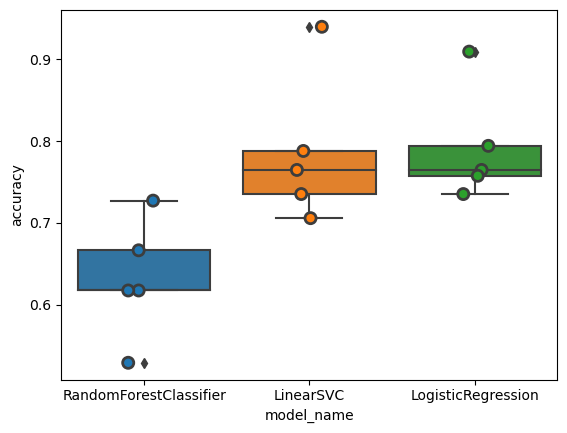

In [12]:
# Try different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [13]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.786631
LogisticRegression        0.792157
RandomForestClassifier    0.631729
Name: accuracy, dtype: float64

In [14]:
category_id_df

,categories,category_id
0,Astrophysics,0
12,Condensed Matter,1
24,General Relativity and Quantum Cosmology,2
36,High Energy Physics,3
48,Mathematical Physics,4
60,Quantum Physics,5
72,Nuclear Experiment,6


## Step 4. Evaluations

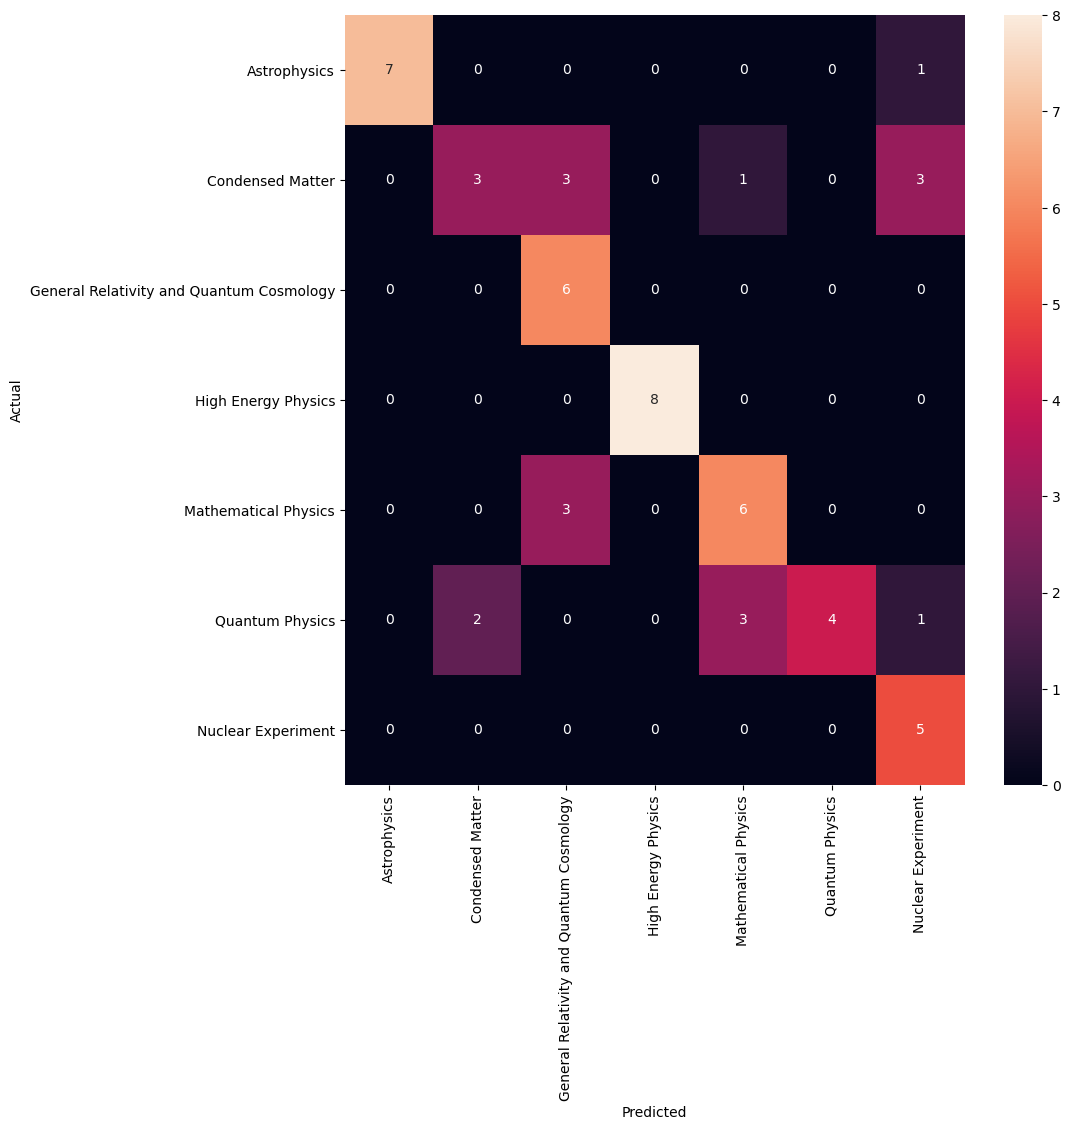

In [15]:
# Build the confusion matrix and see the discrepancies between predicted and actual labels
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.categories.values, yticklabels=category_id_df.categories.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
# Take a look at the wrong predictions and try to understand why it happens
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 0:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['categories', 'abstract']])
            print('')

'Condensed Matter' predicted as 'Astrophysics' : 0 examples.


,categories,abstract



'General Relativity and Quantum Cosmology' predicted as 'Astrophysics' : 0 examples.


,categories,abstract



'High Energy Physics' predicted as 'Astrophysics' : 0 examples.


,categories,abstract



'Mathematical Physics' predicted as 'Astrophysics' : 0 examples.


,categories,abstract



'Quantum Physics' predicted as 'Astrophysics' : 0 examples.


,categories,abstract



'Nuclear Experiment' predicted as 'Astrophysics' : 0 examples.


,categories,abstract



'Astrophysics' predicted as 'Condensed Matter' : 0 examples.


,categories,abstract



'General Relativity and Quantum Cosmology' predicted as 'Condensed Matter' : 0 examples.


,categories,abstract



'High Energy Physics' predicted as 'Condensed Matter' : 0 examples.


,categories,abstract



'Mathematical Physics' predicted as 'Condensed Matter' : 0 examples.


,categories,abstract



'Quantum Physics' predicted as 'Condensed Matter' : 2 examples.


,categories,abstract
155,Quantum Physics,The coherence and correlation properties of effective bosonic modes of a nano-mechanical cavity composed\nof an osci...
149,Quantum Physics,We study the effect of laser phase noise on the generation of stationary entanglement between\nan intracavity optica...



'Nuclear Experiment' predicted as 'Condensed Matter' : 0 examples.


,categories,abstract



'Astrophysics' predicted as 'General Relativity and Quantum Cosmology' : 0 examples.


,categories,abstract



'Condensed Matter' predicted as 'General Relativity and Quantum Cosmology' : 3 examples.


,categories,abstract
107,Condensed Matter,Generic conditions are established for producing a non-Fraunhofer response of the critical supercurrent subject to a...
19,Condensed Matter,We present an extensive experimental and theoretical study of surface acoustic wave-driven ferromagnetic resonance. ...
104,Condensed Matter,The resistivity anisotropy unveiled in the study of detwinned single crystals of the undoped 122\npnictides is here ...



'High Energy Physics' predicted as 'General Relativity and Quantum Cosmology' : 0 examples.


,categories,abstract



'Mathematical Physics' predicted as 'General Relativity and Quantum Cosmology' : 3 examples.


,categories,abstract
56,Mathematical Physics,This paper introduces and studies a field theoretic analogue of the Clebsch\nvariational principle of classical mech...
55,Mathematical Physics,We describe the geometric (Berry) phases arising when some quantum systems are driven by control classical\nparamete...
136,Mathematical Physics,Mathematical diffraction theory is concerned with the analysis of the diffraction image\nof a given structure and th...



'Quantum Physics' predicted as 'General Relativity and Quantum Cosmology' : 0 examples.


,categories,abstract



'Nuclear Experiment' predicted as 'General Relativity and Quantum Cosmology' : 0 examples.


,categories,abstract



'Astrophysics' predicted as 'High Energy Physics' : 0 examples.


,categories,abstract



'Condensed Matter' predicted as 'High Energy Physics' : 0 examples.


,categories,abstract



'General Relativity and Quantum Cosmology' predicted as 'High Energy Physics' : 0 examples.


,categories,abstract



'Mathematical Physics' predicted as 'High Energy Physics' : 0 examples.


,categories,abstract



'Quantum Physics' predicted as 'High Energy Physics' : 0 examples.


,categories,abstract



'Nuclear Experiment' predicted as 'High Energy Physics' : 0 examples.


,categories,abstract



'Astrophysics' predicted as 'Mathematical Physics' : 0 examples.


,categories,abstract



'Condensed Matter' predicted as 'Mathematical Physics' : 1 examples.


,categories,abstract
16,Condensed Matter,"For noninteracting particles moving in a Gaussian random potential, there exists a disagreement\nin the literature o..."



'General Relativity and Quantum Cosmology' predicted as 'Mathematical Physics' : 0 examples.


,categories,abstract



'High Energy Physics' predicted as 'Mathematical Physics' : 0 examples.


,categories,abstract



'Quantum Physics' predicted as 'Mathematical Physics' : 3 examples.


,categories,abstract
61,Quantum Physics,Recently Haah introduced a new quantum error correcting code embedded on a cubic lattice. One\nof the defining prope...
66,Quantum Physics,"In this work, we derived a semiclassical approximation for the matrix elements of a quantum\npropagator in coherent ..."
71,Quantum Physics,"Around 2002, Leonid Gurvits gave a striking randomized algorithm to approximate the\npermanent of an n × n matrix A...."



'Nuclear Experiment' predicted as 'Mathematical Physics' : 0 examples.


,categories,abstract



'Astrophysics' predicted as 'Quantum Physics' : 0 examples.


,categories,abstract



'Condensed Matter' predicted as 'Quantum Physics' : 0 examples.


,categories,abstract



'General Relativity and Quantum Cosmology' predicted as 'Quantum Physics' : 0 examples.


,categories,abstract



'High Energy Physics' predicted as 'Quantum Physics' : 0 examples.


,categories,abstract



'Mathematical Physics' predicted as 'Quantum Physics' : 0 examples.


,categories,abstract



'Nuclear Experiment' predicted as 'Quantum Physics' : 0 examples.


,categories,abstract



'Astrophysics' predicted as 'Nuclear Experiment' : 1 examples.


,categories,abstract
8,Astrophysics,We present new measurements of the temperature-density (T − ρ) relation for neutral hydrogen\nin the 2.0 < z < 2.8 i...



'Condensed Matter' predicted as 'Nuclear Experiment' : 3 examples.


,categories,abstract
100,Condensed Matter,We present a modified Lanczos algorithm to diagonalize lattice Hamiltonians with dramatically\nreduced memory requir...
97,Condensed Matter,Nanoindentation techniques recently developed to measure the mechanical response of crystals under\nexternal loading...
106,Condensed Matter,We report a highly unusual temperature dependence in the magnetoresistance of a weakly interacting high mobility 2D ...



'General Relativity and Quantum Cosmology' predicted as 'Nuclear Experiment' : 0 examples.


,categories,abstract



'High Energy Physics' predicted as 'Nuclear Experiment' : 0 examples.


,categories,abstract



'Mathematical Physics' predicted as 'Nuclear Experiment' : 0 examples.


,categories,abstract



'Quantum Physics' predicted as 'Nuclear Experiment' : 1 examples.


,categories,abstract
63,Quantum Physics,We calculate the differential cross section of polarized light scattering from a cold and dense atomic ensemble.\nTh...


In [17]:
model.fit(features, labels)
N = 3
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Astrophysics':
  . Top unigrams:
       . galaxies
       . galaxy
       . star
  . Top bigrams:
       . star formation
       . column density
       . star forming
# 'Condensed Matter':
  . Top unigrams:
       . spin
       . lattice
       . magnetic
  . Top bigrams:
       . density states
       . monte carlo
       . hubbard model
# 'General Relativity and Quantum Cosmology':
  . Top unigrams:
       . scalar
       . universe
       . equations
  . Top bigrams:
       . scalar field
       . black hole
       . field equations
# 'High Energy Physics':
  . Top unigrams:
       . tev
       . lhc
       . events
  . Top bigrams:
       . standard model
       . pp collisions
       . cross section
# 'Mathematical Physics':
  . Top unigrams:
       . prove
       . operators
       . solutions
  . Top bigrams:
       . pt symmetric
       . quantum mechanical
       . generating functions
# 'Nuclear Experiment':
  . Top unigrams:
       . mev
       . collisions
       . ener

In [18]:
# Print the report for each class
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['categories'].unique()))

                                          precision    recall  f1-score   support

                            Astrophysics       1.00      0.88      0.93         8
                        Condensed Matter       0.60      0.30      0.40        10
General Relativity and Quantum Cosmology       0.50      1.00      0.67         6
                     High Energy Physics       1.00      1.00      1.00         8
                    Mathematical Physics       0.60      0.67      0.63         9
                         Quantum Physics       1.00      0.40      0.57        10
                      Nuclear Experiment       0.50      1.00      0.67         5

                                accuracy                           0.70        56
                               macro avg       0.74      0.75      0.70        56
                            weighted avg       0.77      0.70      0.68        56

